In [22]:

import pandas as pd

In [23]:
  #Reading Dataset
  exercise_data = pd.read_csv( 'exercise.csv' )

In [24]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [25]:
exercise_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [26]:
calories_data = pd.read_csv( 'calories.csv' )

In [27]:
calories_data.describe()

,User_ID,Calories
count,1.500000e+04,15000.000000
mean,1.497736e+07,89.539533
std,2.872851e+06,62.456978
min,1.000116e+07,1.000000
25%,1.247419e+07,35.000000
50%,1.499728e+07,79.000000
75%,1.744928e+07,138.000000
max,1.999965e+07,314.000000


In [28]:
# joining both CSV files using User_ID as key and left outer join 
joined_data = exercise_data.join( calories_data.set_index( 'User_ID' ), on='User_ID', how='left')
joined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [29]:
# Check for null values
print(joined_data.isnull().sum())


User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [30]:
# Check for missing values
print(joined_data.isna().sum())

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


C:\Users\SB\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\SB\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SB\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SB\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SB\anaconda3\

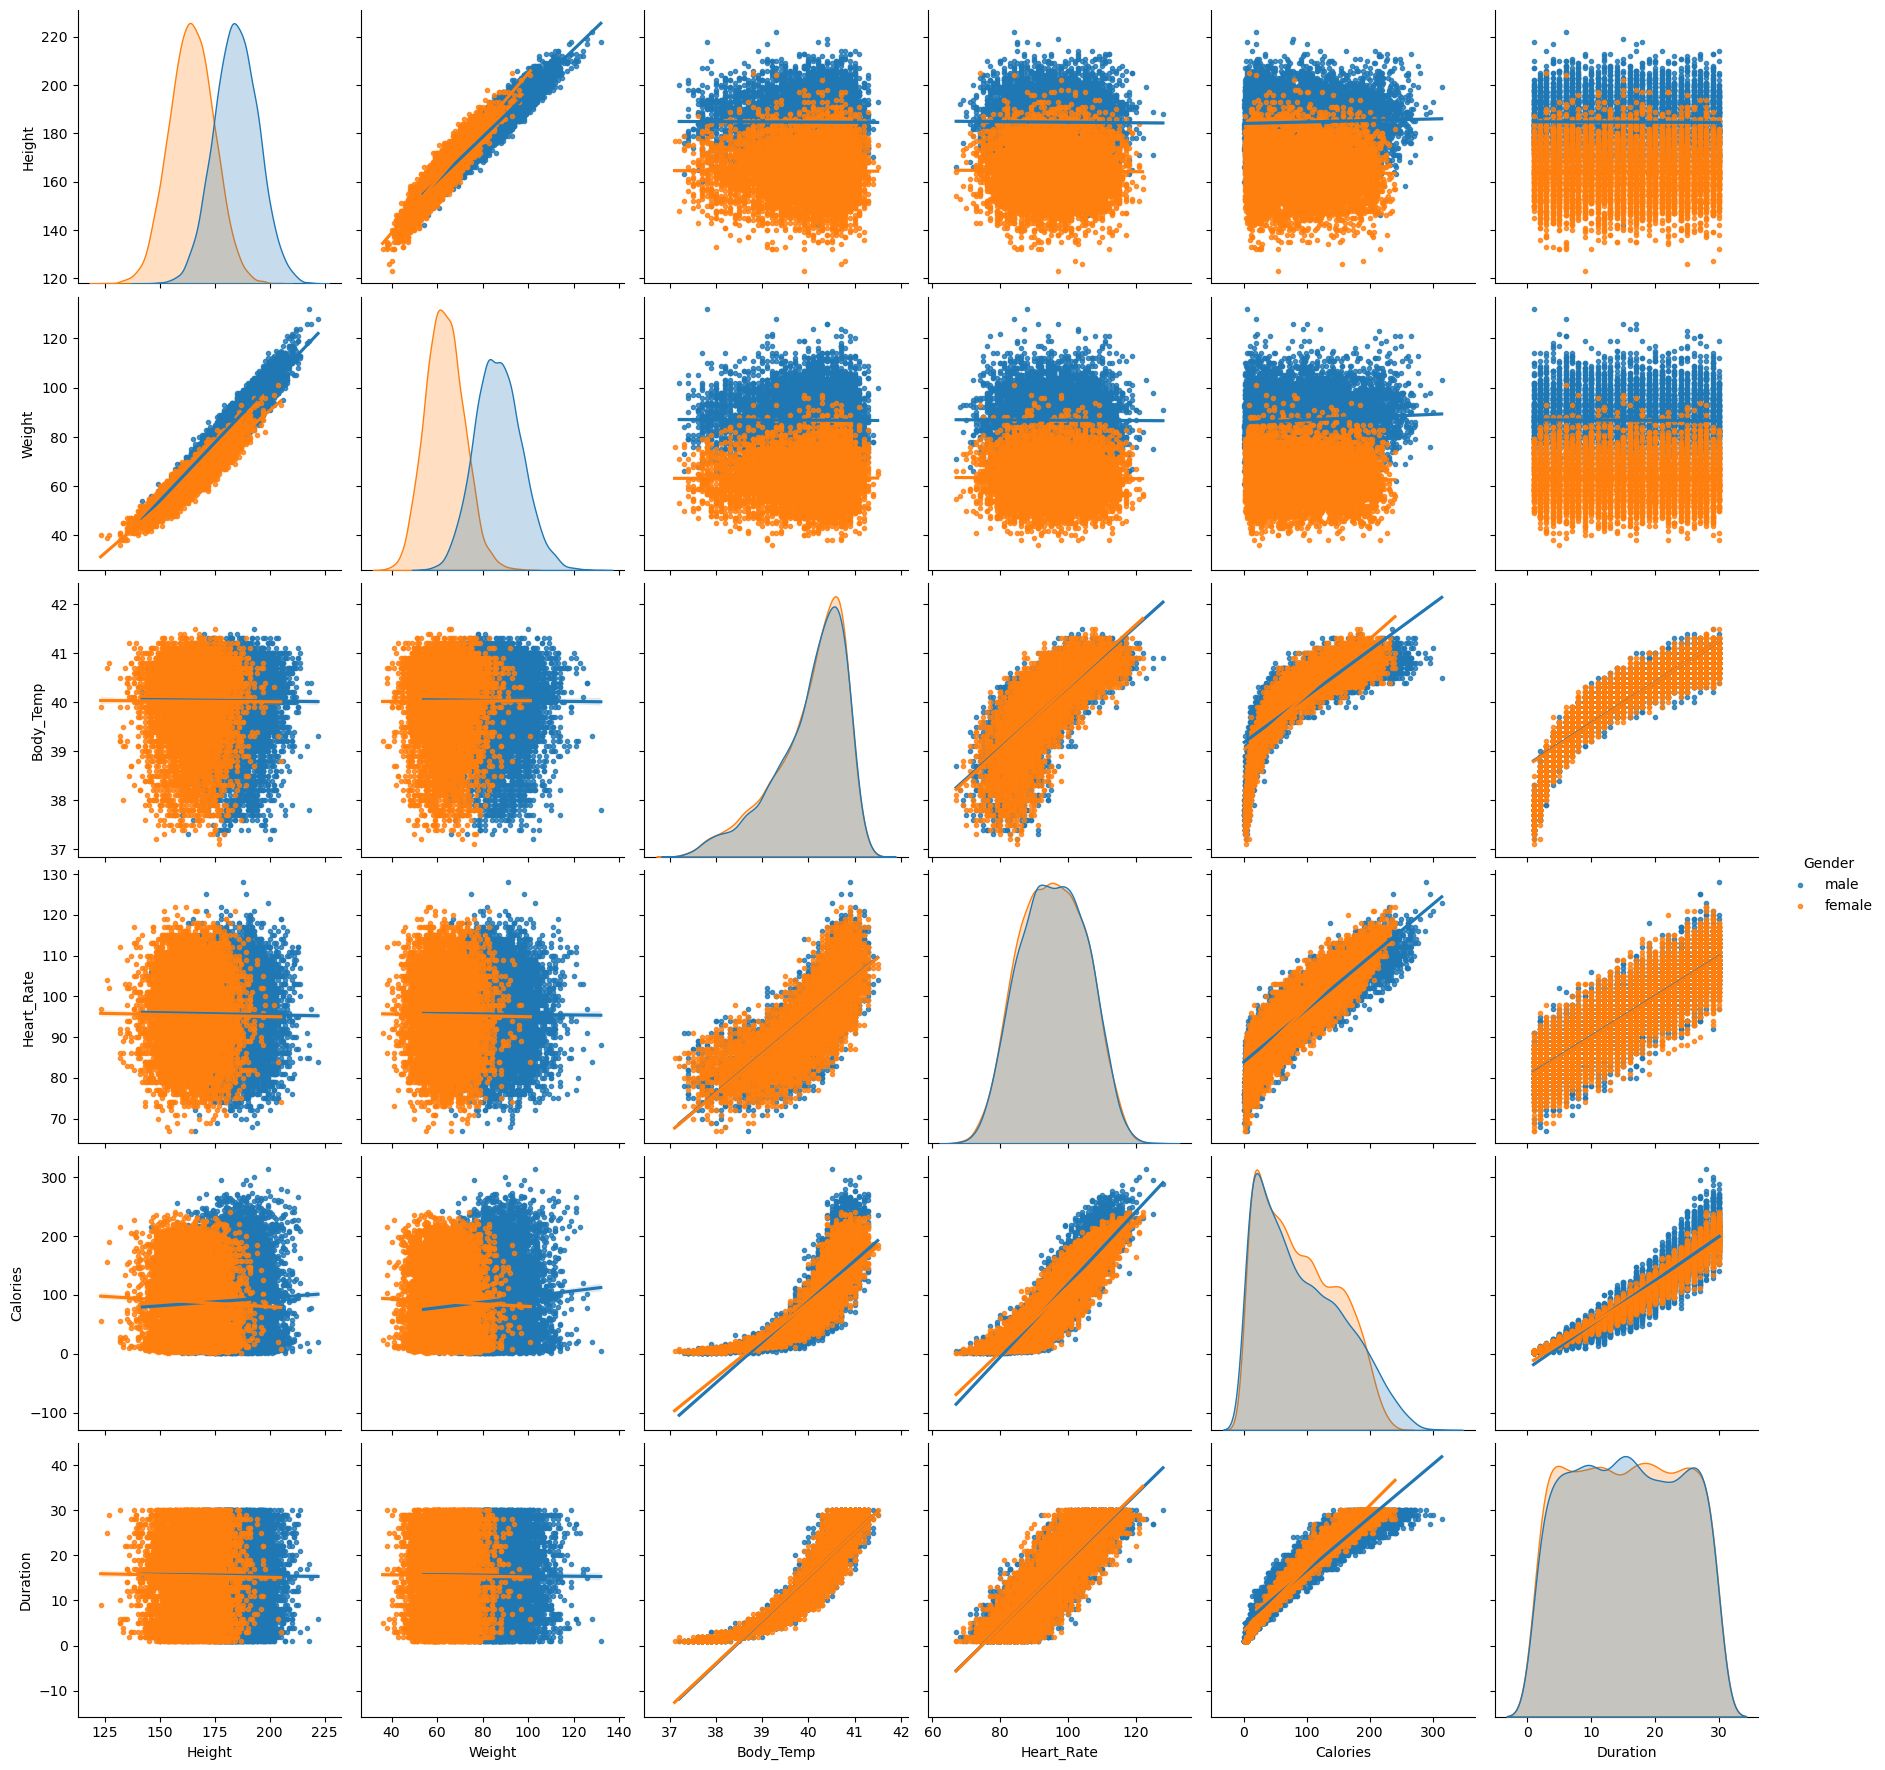

In [31]:
# matrix of scatter plot graphs
%matplotlib inline

import seaborn as sns

cols = [ "Height", "Weight", "Body_Temp", "Heart_Rate", "Calories", "Duration", "Gender" ]

# shows gender in different colors and a linear regression model for each
plot = sns.pairplot( joined_data[ cols ], size=3, markers=".", hue="Gender", kind="reg" )

# get x labels from the last row and save them into an array
xlabels = []
for ax in plot.axes[ -1, : ]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append( xlabel )
    
# apply x labels from the array to the rest of the graphs
y_ax_len = len( plot.axes[ :, 0 ] )
for i in range( len( xlabels ) ):
    for j in range( y_ax_len ):
        if j != i :
            plot.axes[ j, i ].xaxis.set_label_text( xlabels[ i ] )

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [34]:
joined_data = pd.get_dummies(joined_data)

In [36]:
import pandas as pd

# Assuming 'joined_data' is already loaded as a pandas DataFrame
# Print data types of each column
print(joined_data.dtypes)

# Identify categorical columns
categorical_columns = joined_data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)


User_ID            int64
Age                int64
Height           float64
Weight           float64
Duration         float64
Heart_Rate       float64
Body_Temp        float64
Calories         float64
Gender_female       bool
Gender_male         bool
dtype: object
Categorical columns: Index([], dtype='object')


In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['Gender_female', 'Gender_male']  # Replace with your actual categorical column names
for column in categorical_columns:
    joined_data[column] = label_encoder.fit_transform(joined_data[column])

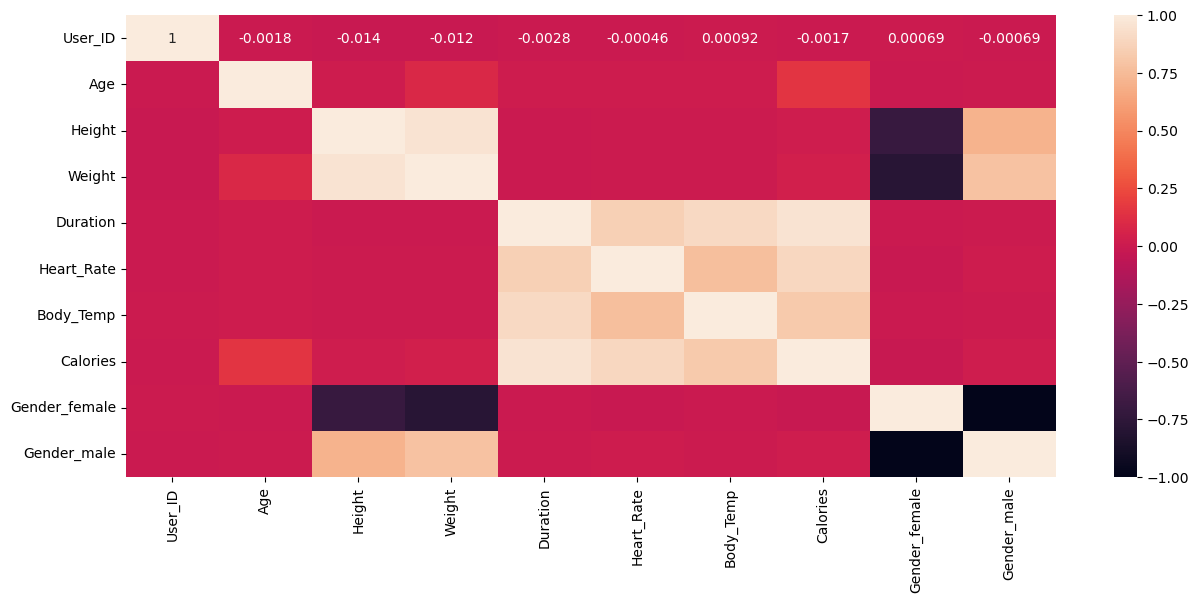

In [39]:
#Visualization of the correlation between the different columns in the dataset.
plt.figure(figsize=(15,6))
sns.heatmap(joined_data.corr(),annot=True)
plt.show()

Correlation Observations:
Duration has a very strong correlation with Calories burned (r=0.96)
r=0.96), which suggests that the longer the exercise duration, the more calories are burned.
Heart Rate and Body Temperature also show strong correlations with Calories (r=0.90 & r=0.82, respectively), indicating that more intense exercises that increase heart rate and body temperature also tend to burn more calories.
Age shows a moderate correlation with Calories (r=0.15), suggesting that age might influence calorie expenditure but not as strongly as other factors.
Height and Weight, associated with Gender (with high correlations due to physiological differences), show weaker direct correlations with Calories, suggesting that while important for body composition, they are less directly predictive of calorie expenditure than factors like duration and intensity of exercise.

In [40]:
#Feature Engineering

In [41]:
joined_data.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,0,1
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,1,0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,0,1
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,1,0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,1,0


In [42]:
# Create a new feature for body mass index (BMI)
joined_data["BMI"] = joined_data["Weight"] / (joined_data["Height"] / 100) ** 2

# Create a new feature for heart rate percentage of maximum heart rate
joined_data["Heart_Rate_Percentage"] = joined_data["Heart_Rate"] / (220 - joined_data["Age"])

# Create a new feature for duration in minutes
joined_data["Duration_Minutes"] = joined_data["Duration"] / 60

# Create a new feature for total energy expenditure (TEE)
joined_data["TEE"] = joined_data["Calories"] + (joined_data["Duration_Minutes"] * 5.0) + (joined_data["BMI"] * 10.0)

# Create a new feature for age groups
bins = [0, 18, 30, 45, 60, 120]
labels = ["<18", "18-30", "30-45", "45-60", ">60"]
joined_data["Age_Group"] = pd.cut(joined_data["Age"], bins=bins, labels=labels)

# Create a new feature for BMI groups
bins = [0, 18.5, 25, 30, 100]
labels = ["Underweight", "Normal", "Overweight", "Obese"]
joined_data["BMI_Group"] = pd.cut(joined_data["BMI"], bins=bins, labels=labels)


In [43]:
joined_data.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male,BMI,Heart_Rate_Percentage,Duration_Minutes,TEE,Age_Group,BMI_Group
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,0,1,26.038781,0.690789,0.483333,493.804478,>60,Overweight
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,1,0,21.773842,0.470000,0.233333,284.905090,18-30,Normal
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,0,1,24.655910,0.582781,0.083333,272.975763,>60,Normal
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,1,0,22.159109,0.537634,0.216667,293.674420,30-45,Normal
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,1,0,24.456063,0.419689,0.166667,280.393968,18-30,Normal


In [44]:
# Drop the User_ID column
joined_data.drop(columns=["User_ID"], inplace=True)

In [45]:
#Data Preprocessing

In [46]:
from sklearn.preprocessing import StandardScaler

In [49]:
import pandas as pd

# Assuming 'joined_data' is already loaded as a pandas DataFrame
# Print data types of each column
print(joined_data.dtypes)

# Identify categorical columns
categorical_columns = joined_data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Age                         int64
Height                    float64
Weight                    float64
Duration                  float64
Heart_Rate                float64
Body_Temp                 float64
Calories                  float64
Gender_female               int64
Gender_male                 int64
BMI                       float64
Heart_Rate_Percentage     float64
Duration_Minutes          float64
TEE                       float64
Age_Group                category
BMI_Group                category
dtype: object
Categorical columns: Index([], dtype='object')


In [52]:
joined_data["Gender_male"] = pd.get_dummies(joined_data["Gender_male"], drop_first=True)

In [54]:
# Calculate the mean only for numerical columns
numerical_columns = joined_data.select_dtypes(include=['number']).columns
joined_data[numerical_columns] = joined_data[numerical_columns].fillna(joined_data[numerical_columns].mean())

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Ensure to apply the scaler only to numerical columns (excluding 'Gender' if it's now a binary)
joined_data[numerical_columns] = scaler.fit_transform(joined_data[numerical_columns])

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Convert Gender column to binary
joined_data["Gender_male"] = pd.get_dummies(joined_data["Gender_male"], drop_first=True)

# Calculate the mean only for numerical columns
numerical_columns = joined_data.select_dtypes(include=['number']).columns
joined_data[numerical_columns] = joined_data[numerical_columns].fillna(joined_data[numerical_columns].mean())

# Standardize the numerical data
scaler = StandardScaler()
joined_data[numerical_columns] = scaler.fit_transform(joined_data[numerical_columns])

In [59]:
# Log square root transformation
# Create the log square root transformations for the columns
joined_data['log_age'] = np.log(joined_data['Age'])
joined_data['sqrt_Height'] = np.sqrt(joined_data['Height'])
joined_data['log_weight'] = np.log(joined_data['Weight'])
joined_data['log_Duration'] = np.log(joined_data['Duration'])
joined_data['sqrt_Heart_Rate'] = np.sqrt(joined_data['Heart_Rate'])
joined_data['sqrt_Body_Temp'] = np.sqrt(joined_data['Body_Temp'])
joined_data['log_BMI'] = np.log(joined_data['BMI'])
 

C:\Users\SB\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\SB\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\SB\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\SB\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\SB\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\SB\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr

In [62]:
# Save the preprocessed data to a new CSV file
joined_data.to_csv("preprocessed_data.csv", index=False)

In [63]:
#Model Selection


In [65]:
# Split the dataset into input features and target variables
X = joined_data.drop(['Calories', 'Gender_male', 'Gender_female', 'Age_Group','BMI_Group'], axis=1)
y = joined_data['Calories']

In [66]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.48472604,  1.08958204,  1.26590864, ...,  0.4406983 ,
         0.87126956,  0.63606289],
       [-1.34217934, -0.59372619, -0.99545805, ...,         nan,
        -0.79448192,         nan],
       [ 1.5436199 ,  0.31806577,  0.26824686, ...,         nan,
                nan, -1.04165539],
       ...,
       [ 0.01237949, -1.08469109, -1.12847962, ...,         nan,
        -1.9682809 ,         nan],
       [ 2.07366466,  1.29999557,  1.465441  , ...,         nan,
                nan,  0.63733969],
       [ 1.19025673, -0.10276129,  0.26824686, ...,         nan,
        -0.02313643,  0.82537604]])

In [67]:
# Drop any rows with missing values in y
y.dropna(inplace=True)

In [68]:
# Drop any rows with missing values in X
X.dropna(inplace=True)

In [69]:

# Scale the input features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
# assuming X and y are numpy arrays
X = X[:617]
y = y[:617]

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.82434656,  0.35117397,  0.36156167, ...,  0.31465065,
         0.64960725,  0.42854534],
       [ 0.07236456, -0.14015106,  0.36156167, ..., -1.64910033,
        -0.84529119,  0.99287808],
       [-1.43159944, -0.38581358, -0.53887647, ...,  1.60108668,
         0.64960725, -0.09166068],
       ...,
       [ 0.44835556,  2.68496785,  1.82477364, ...,  1.21682686,
         0.32185837, -2.23802446],
       [-0.11563094,  0.96533025,  1.37455457, ..., -0.96495307,
        -0.84529119,  0.95987416],
       [ 1.01234206, -0.50864483, -0.98909554, ..., -0.46360265,
        -1.33617301, -2.31461483]])

In [71]:
#Remove customer IDs from the data set
joined_data = joined_data.iloc[:,1:]

#Convertin the predictor variable in a binary numeric variable
joined_data ['Calories'].replace(to_replace='Yes', value=1, inplace=True)
joined_data ['Calories'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
joined_data_dummies = pd.get_dummies(joined_data )
joined_data_dummies.head()

,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male,BMI,Heart_Rate_Percentage,...,log_BMI,Age_Group_<18,Age_Group_18-30,Age_Group_30-45,Age_Group_45-60,Age_Group_>60,BMI_Group_Underweight,BMI_Group_Normal,BMI_Group_Overweight,BMI_Group_Obese
0,1.089582,1.265909,1.619127,0.989404,0.994023,2.265002,False,True,1.086705,1.869035,...,0.083150,False,False,False,False,True,False,False,True,False
1,-0.593726,-0.995458,-0.183990,-0.158461,0.352342,-0.376905,True,False,-1.649455,-0.948927,...,NaN,False,True,False,False,False,False,True,False,False
2,0.318066,0.268247,-1.265861,-0.784569,-1.701035,-1.017367,False,True,0.199528,0.490516,...,-1.611803,False,False,False,False,True,False,True,False,False
3,0.318066,-0.263839,-0.304198,0.467647,0.609015,-0.296847,True,False,-1.402288,-0.085701,...,NaN,False,False,True,False,False,False,True,False,False
4,-1.435380,-1.128480,-0.664821,-1.515029,-0.289338,-0.873263,True,False,0.071317,-1.591050,...,-2.640623,False,True,False,False,False,False,True,False,False


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [75]:
model.fit(X_train, y_train)

LinearRegression()

In [76]:
model.score(X_test, y_test)

-0.010889060645778548

In [77]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(617, 6)

In [78]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
X_pca.shape

(617, 10)

In [79]:
pca.explained_variance_ratio_

array([0.33683829, 0.22372487, 0.21822026, 0.10998208, 0.05095545,
       0.01718476, 0.01273075, 0.01141428, 0.00912675, 0.00780698])

In [80]:
X_pca

array([[-1.8857451 , -0.25914847,  0.48224175, ..., -0.01203362,
         0.01877931,  0.35606725],
       [-0.00712961, -0.6930876 , -1.24424409, ..., -0.05546721,
         0.25639926, -0.15941259],
       [ 1.12614237, -0.71785095,  2.1566117 , ..., -0.21198637,
        -0.34107091, -0.12869246],
       ...,
       [-0.8086242 ,  0.06383467,  0.13683207, ...,  0.08979378,
         0.15156133, -0.30364511],
       [-0.27866042, -1.42439157, -1.04933572, ...,  0.15966261,
         0.22705048, -0.15484255],
       [ 1.18197005,  2.54730155, -1.565298  , ..., -0.28935856,
         0.26673707, -0.0653358 ]])

In [81]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [82]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [83]:
model.fit(X_train_pca, y_train)

LinearRegression()

In [84]:
Lin_Reg_MS = model.score(X_test_pca, y_test)
Lin_Reg_MS

-0.025154677472622122

In [85]:
Y_pred = model.predict(X_test_pca)

In [86]:
y_test

236   -0.729159
481    0.519743
239    0.279569
24    -1.385632
47     0.823962
         ...   
31     0.743904
295    1.432401
413   -1.257540
108    0.823962
212    0.711881
Name: Calories, Length: 124, dtype: float64

In [87]:
def adj_r_squared(y_true, y_pred, n_features):
    n = len(y_true)
    residuals = y_true - y_pred
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - ss_res / ss_tot
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    return adj_r2

In [88]:
Lin_Reg_AR2 = adj_r_squared(y_test, Y_pred, 2)
Lin_Reg_AR2 

-0.04209938288539283

In [89]:
from sklearn.metrics import mean_squared_error

In [90]:
Lin_Reg_Mse = mean_squared_error(y_test,Y_pred)
Lin_Reg_Mse

1.127313904426539

In [91]:
#Ridge Regression
from sklearn.linear_model import Ridge

In [92]:
ridge_model = Ridge(alpha=1)

In [93]:
ridge_model.fit(X_train_pca, y_train)

Ridge(alpha=1)

In [94]:
y_pred_ridge = ridge_model.predict(X_test_pca)

In [95]:
Ridge_Mse = mean_squared_error(y_test,y_pred_ridge)
Ridge_Mse


1.1270906268158047

In [96]:
Ridge_MS = ridge_model.score(X_test_pca, y_test)
Ridge_MS

-0.02495163368320341

In [97]:
Ridge_AR2 = adj_r_squared(y_test, y_pred_ridge, 2)
Ridge_AR2

-0.041892983000281214

In [98]:
#Lasso Regression
from sklearn.linear_model import Lasso

In [99]:
lasso_model = Lasso(alpha=1.0)


In [100]:
lasso_model.fit(X_train_pca, y_train)

Lasso()

In [101]:
y_pred_lasso = lasso_model.predict(X_test_pca)

In [102]:
Lasso_Mse = mean_squared_error(y_test,y_pred_lasso)
Lasso_Mse

1.1208009623861945

In [103]:
Lasso_MS = lasso_model.score(X_test_pca, y_test)
Lasso_MS

-0.019231950031267875

In [104]:
Lasso_AR2 = adj_r_squared(y_test, y_pred_lasso, 2)
Lasso_AR2

-0.03607875912269365

In [105]:
#Support Vector Regression
from sklearn.svm import SVR

In [106]:
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)

In [107]:
svr_model.fit(X_train_pca, y_train)

SVR(kernel='linear')

In [108]:
y_pred_SVR = svr_model.predict(X_test_pca)

In [109]:
SVR_Mse = mean_squared_error(y_test,y_pred_SVR)
SVR_Mse

1.229071495021062

In [110]:
SVR_MS = svr_model.score(X_test_pca, y_test)
SVR_MS

-0.117690810981403

In [111]:
SVR_AR2 = adj_r_squared(y_test, y_pred_SVR, 2)
SVR_AR2

-0.13616503926208745

In [112]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 330.3 kB/s eta 0:05:02
   ---------------------------------------- 0.0/99.8 MB 326.8 kB/s eta 0:05:06
   ---------------------------------------- 0.2/99.8 MB 1.0 MB/s eta 0:01:38
   ---------------------------------------- 0.4/99.8 MB 2.2 MB/s eta 0:00:46
   ---------------------------------------- 0.9/99.8 MB 3.6 MB/s eta 0:00:28
   ---------------------------------------- 1.2/99.8 MB 4.3 MB/s eta 0:00:23
    --------------------------------------- 1.3/99.8 MB 4.2 MB/s eta 0:00:24
    --------------------------------------- 2.1/99.8 MB 5.7 MB/s eta 0:00:18
   - -------------------------------------- 2.7/99.8 MB 6.9 MB/s eta 0:00:15
   - -------------------------------------- 3.2/99.8 MB 6.7 MB/s eta 0:00:15
   - -------------------------------------- 3.8/99.8 MB 7.4 MB/s eta 0:00:14
   - ----

In [114]:
#XG Boost Regression
from xgboost import XGBRegressor

In [115]:
xgb_model = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100)

In [116]:
xgb_model.fit(X_train_pca, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [117]:
y_pred_XGB = xgb_model.predict(X_test_pca)

In [118]:
XGB_Mse = mean_squared_error(y_test,y_pred_XGB)
XGB_Mse

1.2421259945046639

In [119]:
XGB_MS = xgb_model.score(X_test_pca, y_test)
XGB_MS

-0.12956228808740589

In [120]:
XGB_AR2 = adj_r_squared(y_test, y_pred_XGB, 2)
XGB_AR2

-0.14823273913017276

In [121]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [122]:
dt_model = DecisionTreeRegressor(max_depth=3)

In [123]:
dt_model.fit(X_train_pca, y_train)

DecisionTreeRegressor(max_depth=3)

In [124]:
y_pred_dt = dt_model.predict(X_test_pca)

In [125]:
DT_Mse = mean_squared_error(y_test,y_pred_dt)
DT_Mse

1.1941619187597243

In [126]:
DT_MS = dt_model.score(X_test_pca, y_test)
DT_MS

-0.08594480372257962

In [127]:
DT_AR2 = adj_r_squared(y_test, y_pred_dt, 2)
DT_AR2

-0.10389430461055627

In [128]:
#Model Scores
print("Linear regression Model Score ", Lin_Reg_MS)
print("Ridge regression Model Score ", Ridge_MS)
print("Lasso regression Model Score ", Lasso_MS)
print("SVR regression Model Score ", SVR_MS)
print("XGB regression Model Score ", XGB_MS)
print("Decision Tree regression Model Score ", DT_MS)

Linear regression Model Score  -0.025154677472622122
Ridge regression Model Score  -0.02495163368320341
Lasso regression Model Score  -0.019231950031267875
SVR regression Model Score  -0.117690810981403
XGB regression Model Score  -0.12956228808740589
Decision Tree regression Model Score  -0.08594480372257962


In [129]:
#MSE Values
print("Linear regression Model Score ", Lin_Reg_Mse)
print("Ridge regression Model Score ", Ridge_Mse)
print("Lasso regression Model Score ", Lasso_Mse)
print("SVR regression Model Score ", SVR_Mse)
print("XGB regression Model Score ", XGB_Mse)
print("Decision Tree regression Model Score ", DT_Mse)

Linear regression Model Score  1.127313904426539
Ridge regression Model Score  1.1270906268158047
Lasso regression Model Score  1.1208009623861945
SVR regression Model Score  1.229071495021062
XGB regression Model Score  1.2421259945046639
Decision Tree regression Model Score  1.1941619187597243


In [130]:
#Adjusted R2 Values
print("Linear regression Model Score ", Lin_Reg_AR2)
print("Ridge regression Model Score ", Ridge_AR2)
print("Lasso regression Model Score ", Lasso_AR2)
print("SVR regression Model Score ", SVR_AR2)
print("XGB regression Model Score ", XGB_AR2)
print("Decision Tree regression Model Score ", DT_AR2)

Linear regression Model Score  -0.04209938288539283
Ridge regression Model Score  -0.041892983000281214
Lasso regression Model Score  -0.03607875912269365
SVR regression Model Score  -0.13616503926208745
XGB regression Model Score  -0.14823273913017276
Decision Tree regression Model Score  -0.10389430461055627


In [131]:
print("Calories Data:")
print(calories_data.head())
print("\nExercise Data:")
print(exercise_data.head())

combined_data = pd.merge(exercise_data, calories_data, on='User_ID')

# Display the first few rows of the combined dataset
print("\nCombined Data:")
print(combined_data.head())

Calories Data:
    User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

Exercise Data:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

Combined Data:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       

In [133]:
import pandas as pd

# Display the first few rows of the datasets
calories_data_head = calories_data.head()
exercise_data_head = exercise_data.head()

# Check column names for potential merge keys
calories_columns = calories_data.columns
exercise_columns = exercise_data.columns

calories_data_head, exercise_data_head, calories_columns, exercise_columns


(    User_ID  Calories
 0  14733363     231.0
 1  14861698      66.0
 2  11179863      26.0
 3  16180408      71.0
 4  17771927      35.0,
     User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
 0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
 1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
 2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
 3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
 4  17771927  female   27   154.0    58.0      10.0        81.0       39.8,
 Index(['User_ID', 'Calories'], dtype='object'),
 Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
        'Heart_Rate', 'Body_Temp'],
       dtype='object'))

In [134]:
#ANOVA ANALYSIS
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA to test if there are significant differences in Calories burned across different genders
anova_model = ols('Calories ~ C(Gender)', data=combined_data).fit()
anova_results = sm.stats.anova_lm(anova_model, typ=2)  # Type 2 ANOVA DataFrame

anova_results

,sum_sq,df,F,PR(>F)
C(Gender),2.924540e+04,1.0,7.50039,0.006176
Residual,5.847997e+07,14998.0,NaN,NaN


Summary of ANOVA Results:
F-Statistic: 7.50039, which tests the null hypothesis that the means of the different groups (males and females) are the same.
p-Value: 0.0062, indicating that we can reject the null hypothesis that there's no difference in average calories burned between males and females at the 5% significance level.

In [144]:
#CHI-SQUARE TEST
# Example of binning a numerical variable into categories
combined_data['Age_group'] = pd.cut(combined_data['Age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '21-40', '41-60', '61-80'])

# Create a contingency table
contingency_table = pd.crosstab(combined_data['Age_group'], combined_data['Gender'])

# Perform the Chi-square test
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
chi2, p_value

(1.0831360416446572, 0.7811465907530754)

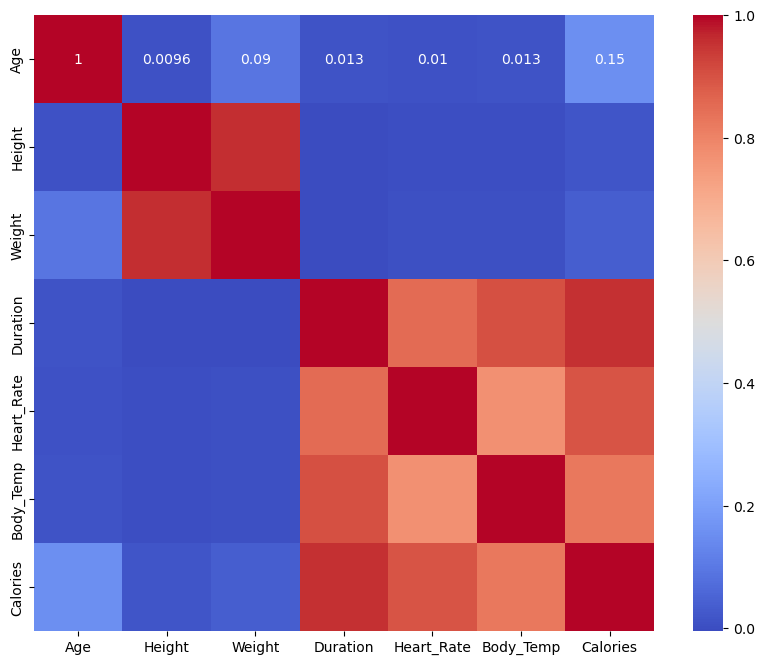

In [146]:
#CORELATION ANALYSIS
# Calculate the correlation matrix
correlation_matrix = combined_data[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']].corr()

# Visualizing the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [149]:
#T-TEST
from scipy.stats import ttest_ind

# Assuming 'Gender' is coded as 0 for females and 1 for males
group1 = combined_data[joined_data['Gender_male'] == 0]['Calories']
group2 = combined_data[joined_data['Gender_male'] == 1]['Calories']

# Perform the t-test
t_stat, p_value = ttest_ind(group1, group2)
t_stat, p_value

(-2.73868395056871, 0.006175846213736039)

In [150]:
#T-TEST
from scipy.stats import ttest_ind

# Assuming 'Gender' is coded as 0 for females and 1 for males
group1 = combined_data[joined_data['Gender_female'] == 0]['Calories']
group2 = combined_data[joined_data['Gender_female'] == 1]['Calories']

# Perform the t-test
t_stat, p_value = ttest_ind(group1, group2)
t_stat, p_value

(2.73868395056871, 0.006175846213736039)

In [151]:
#Fisher's Exact Test
import pandas as pd
from scipy.stats import fisher_exact

# Example data - you should load your actual data here
data = {
    "Gender_female": [True, False, False, True, True],
    "Age_Group_>60": [True, False, True, False, False]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['Gender_female'], df['Age_Group_>60'])

# Perform Fisher's Exact Test
odds_ratio, p_value = fisher_exact(contingency_table)

print("Odds Ratio:", odds_ratio)
print("P-Value:", p_value)


Odds Ratio: 0.5
P-Value: 1.0


In [152]:
#McNemar's Test
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar

# Example data
data = {
    'Condition_A': [True, False, True, False, True, False, True, False],
    'Condition_B': [True, True, False, False, True, True, False, False]
}
df = pd.DataFrame(data)

# Creating the 2x2 contingency table
# where '11' is True for both conditions, '10' is True for A and False for B,
# '01' is False for A and True for B, and '00' is False for both
contingency_table = pd.crosstab(df['Condition_A'], df['Condition_B'])

# Applying the McNemar test
result = mcnemar(contingency_table, exact=True)  # Use exact=False for large samples

print("McNemar's Test")
print("p-value =", result.pvalue)
print("statistic =", result.statistic)


McNemar's Test
p-value = 1.0
statistic = 2.0
